<a href="https://colab.research.google.com/github/BhumiRaval123/Machine-Learning/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
import keras.utils.np_utils as ku
import keras.models as models
import keras.layers as layers
from keras import regularizers
from keras.layers import Dropout
#from keras.optimizers import rmsprop, Adam
from keras.utils import to_categorical

In [2]:
%matplotlib inline

In [4]:
import tensorflow as tf


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D

In [6]:
print(keras.__version__)

2.4.3


In [7]:
from keras.datasets import fashion_mnist
(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
plt.imshow(train_X[0])
print(train_Y[0])

In [ ]:
print('Training data shape : ', train_X.shape, train_Y.shape)

print('Testing data shape : ', test_X.shape, test_Y.shape)

In [ ]:
classes = np.unique(train_Y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

In [ ]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

In [ ]:
train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)
train_X.shape, test_X.shape

In [13]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255

In [ ]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

In [15]:
from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

In [ ]:
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape


In [17]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

In [18]:
batch_size = 64
epochs = 20
num_classes = 10

In [19]:
import keras
import keras.models as models

In [28]:
train_X.shape[1:]

(28, 28, 1)

In [29]:
model = tf.keras.Sequential()

In [30]:
model.add(tf.keras.layers.Conv2D(32,(3,3),activation='linear',input_shape=(28, 28,1),padding='same'))
model.add(tf.keras.layers.LeakyReLU(alpha=0.1))
model.add(tf.keras.layers.MaxPooling2D((2, 2),padding='same'))


In [31]:
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='linear',padding='same'))
model.add(tf.keras.layers.LeakyReLU(alpha=0.1))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='linear',padding='same'))
model.add(tf.keras.layers.LeakyReLU(alpha=0.1))                  
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2),padding='same'))


In [33]:
model.add(tf.keras.layers.Flatten())

In [36]:
model.add(tf.keras.layers.Dense(128, activation='linear'))
model.add(tf.keras.layers.LeakyReLU(alpha=0.1))                  
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

In [37]:
model.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])


In [38]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 7, 128)        

In [39]:
model_train=model.fit(train_X, train_label, batch_size=64,epochs=20,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/20
750/750 [==============================] - 86s 113ms/step - loss: 1.5976 - accuracy: 0.3570 - val_loss: 0.4888 - val_accuracy: 0.8382
Epoch 2/20
750/750 [==============================] - 85s 114ms/step - loss: 0.4068 - accuracy: 0.8638 - val_loss: 0.3296 - val_accuracy: 0.8849
Epoch 3/20
750/750 [==============================] - 86s 114ms/step - loss: 0.2857 - accuracy: 0.9028 - val_loss: 0.2903 - val_accuracy: 0.8994
Epoch 4/20
750/750 [==============================] - 86s 114ms/step - loss: 0.2397 - accuracy: 0.9186 - val_loss: 0.2727 - val_accuracy: 0.9038
Epoch 5/20
750/750 [==============================] - 85s 114ms/step - loss: 0.1991 - accuracy: 0.9301 - val_loss: 0.2510 - val_accuracy: 0.9137
Epoch 6/20
750/750 [==============================] - 85s 113ms/step - loss: 0.1698 - accuracy: 0.9410 - val_loss: 0.2525 - val_accuracy: 0.9152
Epoch 7/20
750/750 [==============================] - 85s 114ms/step - loss: 0.1420 - accuracy: 0.9504 - val_loss: 0.2575 - val_ac

In [40]:
test_eval = model.evaluate(test_X, test_Y_one_hot, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.42985454201698303
Test accuracy: 0.9085000157356262


In [41]:
model_train.history

{'accuracy': [0.5228958129882812,
  0.8745208382606506,
  0.9033750295639038,
  0.9174374938011169,
  0.9307916760444641,
  0.9392708539962769,
  0.9467291831970215,
  0.9534791707992554,
  0.9600625038146973,
  0.965624988079071,
  0.9705208539962769,
  0.9732499718666077,
  0.976812481880188,
  0.9770416617393494,
  0.9804999828338623,
  0.9827708601951599,
  0.9840208292007446,
  0.9846875071525574,
  0.9866041541099548,
  0.984666645526886],
 'loss': [1.1645450592041016,
  0.36907270550727844,
  0.28114771842956543,
  0.23606963455677032,
  0.19636434316635132,
  0.17233163118362427,
  0.1497420221567154,
  0.12836189568042755,
  0.11256537586450577,
  0.09723351895809174,
  0.08331003040075302,
  0.0763099193572998,
  0.06622718274593353,
  0.06465715169906616,
  0.056605055928230286,
  0.0506974495947361,
  0.047206588089466095,
  0.04700511321425438,
  0.0397847518324852,
  0.044450633227825165],
 'val_accuracy': [0.8382499814033508,
  0.8849166631698608,
  0.8994166851043701,
 

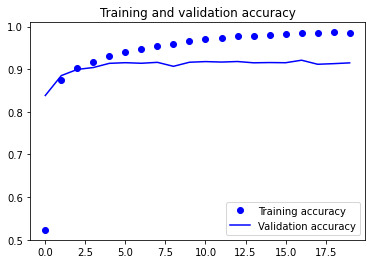

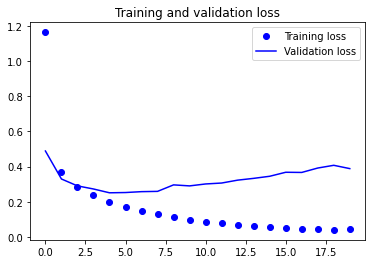

In [42]:
accuracy = model_train.history['accuracy']
val_accuracy = model_train.history['val_accuracy']
loss = model_train.history['loss']
val_loss = model_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [43]:
fashion_model = tf.keras.Sequential()
fashion_model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(28,28,1)))
fashion_model.add(tf.keras.layers.LeakyReLU(alpha=0.1))
fashion_model.add(tf.keras.layers.MaxPooling2D((2, 2),padding='same'))
fashion_model.add(tf.keras.layers.Dropout(0.25))
fashion_model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(tf.keras.layers.LeakyReLU(alpha=0.1))
fashion_model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(tf.keras.layers.Dropout(0.25))
fashion_model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(tf.keras.layers.LeakyReLU(alpha=0.1))                  
fashion_model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(tf.keras.layers.Dropout(0.4))
fashion_model.add(tf.keras.layers.Flatten())
fashion_model.add(tf.keras.layers.Dense(128, activation='linear'))
fashion_model.add(tf.keras.layers.LeakyReLU(alpha=0.1))           
fashion_model.add(tf.keras.layers.Dropout(0.3))
fashion_model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

In [44]:
fashion_model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_9 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_10 (LeakyReLU)   (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 64)         

In [45]:
fashion_model.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])


In [46]:
fashion_train_dropout = fashion_model.fit(train_X, train_label, batch_size=64,epochs=20,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/20
750/750 [==============================] - 91s 120ms/step - loss: 0.8606 - accuracy: 0.6714 - val_loss: 0.3724 - val_accuracy: 0.8614
Epoch 2/20
750/750 [==============================] - 90s 120ms/step - loss: 0.3838 - accuracy: 0.8597 - val_loss: 0.3105 - val_accuracy: 0.8842
Epoch 3/20
750/750 [==============================] - 90s 120ms/step - loss: 0.3326 - accuracy: 0.8764 - val_loss: 0.2760 - val_accuracy: 0.8972
Epoch 4/20
750/750 [==============================] - 90s 119ms/step - loss: 0.2979 - accuracy: 0.8898 - val_loss: 0.2576 - val_accuracy: 0.9045
Epoch 5/20
750/750 [==============================] - 90s 121ms/step - loss: 0.2852 - accuracy: 0.8936 - val_loss: 0.2619 - val_accuracy: 0.9013
Epoch 6/20
750/750 [==============================] - 90s 120ms/step - loss: 0.2696 - accuracy: 0.9003 - val_loss: 0.2468 - val_accuracy: 0.9058
Epoch 7/20
750/750 [==============================] - 90s 119ms/step - loss: 0.2582 - accuracy: 0.9041 - val_loss: 0.2328 - val_ac

In [ ]:
fashion_model.save("fashion_model_dropout.h5py")

INFO:tensorflow:Assets written to: fashion_model_dropout.h5py/assets


In [ ]:
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=1)


313/313 [==============================] - 6s 19ms/step - loss: 0.2188 - accuracy: 0.9247


In [ ]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.2188134491443634
Test accuracy: 0.9247000217437744


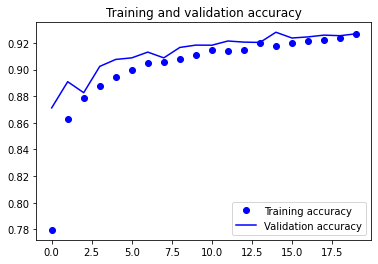

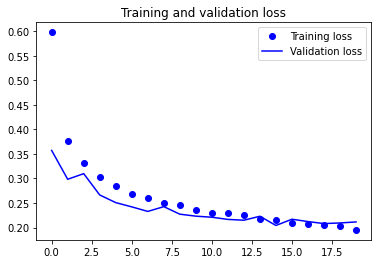

In [ ]:
accuracy = fashion_train_dropout.history['accuracy']
val_accuracy = fashion_train_dropout.history['val_accuracy']
loss = fashion_train_dropout.history['loss']
val_loss = fashion_train_dropout.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
predicted_classes = fashion_model.predict(test_X)


In [ ]:
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)


Found 9209 correct labels


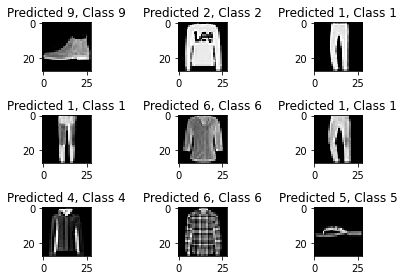

In [ ]:
correct = np.where(predicted_classes==test_Y)[0]
print ("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], test_Y[correct]))
    plt.tight_layout()

Found 791 incorrect labels


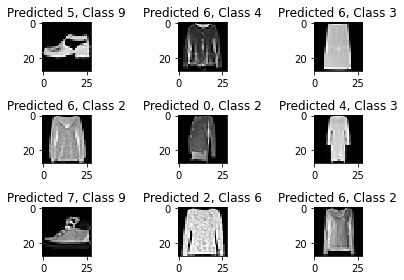

In [ ]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print ("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], test_Y[incorrect]))
    plt.tight_layout()

In [ ]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.78      0.92      0.85      1000
     Class 1       0.99      0.98      0.99      1000
     Class 2       0.87      0.89      0.88      1000
     Class 3       0.94      0.91      0.92      1000
     Class 4       0.87      0.89      0.88      1000
     Class 5       0.99      0.98      0.99      1000
     Class 6       0.84      0.70      0.77      1000
     Class 7       0.96      0.98      0.97      1000
     Class 8       0.99      0.99      0.99      1000
     Class 9       0.98      0.96      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



TypeError: ignored

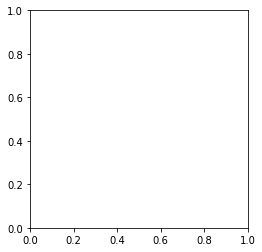

In [ ]:
plt.imshow(train_X[0])

In [ ]:
smallBlur = np.ones((7, 7), dtype="float") * (1.0 / (7 * 7))

In [ ]:
import cv2

In [ ]:
im = Image.open( 'myBike.png' )
im.show()